# Distributions of nodes and edges in in-house and OpenBioLink networks

This notebook plots the distributions of nodes and edges in the in-house and OpenBioLink networks used in the application scenario of drug2ways.

In [1]:
import os
import getpass
import sys
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
getpass.getuser()

'sarahbeenie'

In [3]:
sys.version

'3.7.5 (default, Nov  1 2019, 02:16:32) \n[Clang 11.0.0 (clang-1100.0.33.8)]'

In [4]:
time.asctime()

'Fri May  8 12:58:57 2020'

Load networks

In [5]:
custom = pd.read_csv('data/custom_network.tsv', sep='\t')
openbiolink = pd.read_csv('data/openbiolink_network.tsv', sep='\t')

### Get nodes in custom network

Remove duplicate nodes in source ID and target ID columns 

In [6]:
source_identifier = custom['source']
target_identifier = custom['target']

custom_network_nodes = pd.concat([source_identifier, target_identifier], ignore_index=True)

duplicates_count_custom = 0
for index, duplicate in (custom_network_nodes.duplicated()).iteritems():
    if duplicate == True:
        duplicates_count_custom += 1
        
unique_nodes_custom_network = custom_network_nodes.drop_duplicates()

Get entity counts for unique nodes

In [7]:
custom_drugs = 0
custom_proteins = 0
custom_diseases = 0
custom_phenotypes = 0

for _, entity in unique_nodes_custom_network.iteritems():
    if entity.startswith('drugbank:'):
        custom_drugs += 1
    elif entity.startswith('HGNC:'):
        custom_proteins += 1
    elif entity.startswith('UMLS:'):
        custom_diseases += 1
    elif entity.startswith('HP:'):
        custom_phenotypes += 1
    else:
        raise ValueError(f'{entity} not a Drugbank, HGNC, or UMLS ID')  

### Get edges in custom network 

#### Edges in dataset:
1. drugs (DrugBank ID) and genes (HGNC symbol)
2. genes (HGNC symbol) and genes (HGNC symbol)
3. genes (HGNC symbol) and disease/phenotypes (UMLS concept ID)

In [8]:
drug_protein_df = custom.loc[
    (custom['source'].str.startswith('drugbank:')) & 
    (custom['target'].str.startswith('HGNC:'))]

protein_protein_df = custom.loc[
    (custom['source'].str.startswith('HGNC:')) & 
    (custom['target'].str.startswith('HGNC:'))]

protein_disease_df = custom.loc[
    (custom['source'].str.startswith('HGNC:')) & 
    (custom['target'].str.startswith('UMLS:'))]

protein_phenotype_df = custom.loc[
    (custom['source'].str.startswith('HGNC:')) & 
    (custom['target'].str.startswith('HP:'))]

Get unique disease and phenotype nodes and edges in custom network

In [9]:
drug_protein_custom = len(drug_protein_df.index)
protein_protein_custom = len(protein_protein_df.index)
protein_disease_custom = len(protein_disease_df.index)
protein_phenotype_custom = len(protein_phenotype_df.index)

In [10]:
print('##### Number of nodes in custom network #####')
print(f'{custom_network_nodes.size}: total # of nodes')
print(f'{duplicates_count_custom}: # of duplicate nodes')
print(f'{unique_nodes_custom_network.size}: # of unique nodes')
print(f'{custom_drugs}: # of unique drugs')
print(f'{custom_proteins}: # of unique proteins')
print(f'{custom_diseases}: # of unique diseases')
print(f'{custom_phenotypes}: # of unique phenotypes \n')

print('##### Number of edges in custom network ######')       
print(f'{len(custom.index)}: total # of interactions')
print(f'{drug_protein_custom}: # of drug-protein interactions')
print(f'{protein_protein_custom}: # of protein-protein interactions')
print(f'{protein_disease_custom}: # of protein-disease interactions')
print(f'{protein_phenotype_custom}: # of protein-phenotype interactions')

##### Number of nodes in custom network #####
440738: total # of nodes
418946: # of duplicate nodes
21792: # of unique nodes
1350: # of unique drugs
9921: # of unique proteins
2905: # of unique diseases
7616: # of unique phenotypes 

##### Number of edges in custom network ######
220369: total # of interactions
4673: # of drug-protein interactions
50764: # of protein-protein interactions
3964: # of protein-disease interactions
160968: # of protein-phenotype interactions


### Get nodes in OpenBioLink network

Remove duplicate nodes in source and target columns 

In [11]:
source = openbiolink['source']
target = openbiolink['target']

openbiolink_nodes = pd.concat([source, target], ignore_index=True)

duplicates_count_openbiolink = 0
for index, duplicate in (openbiolink_nodes.duplicated()).iteritems():
    if duplicate == True:
        duplicates_count_openbiolink += 1
        
unique_nodes_openbiolink = openbiolink_nodes.drop_duplicates()

Get entity counts for unique nodes

In [12]:
openbiolink_drugs = 0
openbiolink_proteins = 0
openbiolink_diseases = 0
openbiolink_phenotypes = 0

for _, entity in unique_nodes_openbiolink.iteritems():
    if entity.startswith('PUBCHEM.COMPOUND:'):
        openbiolink_drugs += 1
    elif entity.startswith('NCBIGENE:'):
        openbiolink_proteins += 1
    elif entity.startswith('DOID:'):
        openbiolink_diseases += 1
    elif entity.startswith('HP:'):
        openbiolink_phenotypes += 1
    else:
        raise ValueError(f'{entity} not a PubChem, NCBI, DO or HP ID.')  


### Get edges in OpenBioLink network

#### Edges in dataset:

1. drugs (PubChem compound) and genes (NCBI gene)
2. genes (NCBI gene) and genes (NCBI gene)
3. genes (NCBI gene) and diseases (DOID)
4. genes (NCBI gene) and phenotypes (HP)

In [13]:
drug_protein_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('PUBCHEM.COMPOUND:')) & 
    (openbiolink['target'].str.startswith('NCBIGENE:'))]

protein_protein_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('NCBIGENE:')) & 
    (openbiolink['target'].str.startswith('NCBIGENE:'))]

protein_disease_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('NCBIGENE:')) & 
    (openbiolink['target'].str.startswith('DOID:'))]

protein_phenotype_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('NCBIGENE:')) & 
    (openbiolink['target'].str.startswith('HP:'))]

disease_phenotype_df_obl = openbiolink.loc[
    (openbiolink['source'].str.startswith('DOID:')) & 
    (openbiolink['target'].str.startswith('HP:'))]

In [14]:
drug_protein_obl = len(drug_protein_df_obl.index)
protein_protein_obl = len(protein_protein_df_obl.index)
protein_disease_obl = len(protein_disease_df_obl.index)
protein_phenotype_obl = len(protein_phenotype_df_obl.index)

In [15]:
print('##### Number of nodes in OpenBioLink network #####')
print(f'{openbiolink_nodes.size}: total # of nodes')
print(f'{duplicates_count_openbiolink}: # of duplicate nodes')
print(f'{unique_nodes_openbiolink.size}: # of unique nodes')
print(f'{openbiolink_diseases}: # of unique diseases')
print(f'{openbiolink_phenotypes}: # of unique phenotypes')
print(f'{openbiolink_drugs}: # of unique drugs')
print(f'{openbiolink_proteins}: # of unique proteins \n')

print('##### Number of edges in OpenBioLink network #####')
print(f'{len(openbiolink.index)}: total # of edges')
print(f'{drug_protein_obl}: # of drug-protein interactions')
print(f'{protein_protein_obl}: # of protein-protein interactions')
print(f'{protein_disease_obl}: # of protein-disease interactions')
print(f'{protein_phenotype_obl}: # of protein-phenotype interactions')

##### Number of nodes in OpenBioLink network #####
471762: total # of nodes
446956: # of duplicate nodes
24806: # of unique nodes
1512: # of unique diseases
7616: # of unique phenotypes
7407: # of unique drugs
8271: # of unique proteins 

##### Number of edges in OpenBioLink network #####
235881: total # of edges
32761: # of drug-protein interactions
39154: # of protein-protein interactions
2963: # of protein-disease interactions
161003: # of protein-phenotype interactions


### Plot distributions of nodes in custom and OpenBioLink networks

In [16]:
data_nodes = {
    'Network': ['In-house','OpenBioLink','In-house','OpenBioLink','In-house','OpenBioLink','In-house','OpenBioLink'],
    'Count':[custom_drugs, openbiolink_drugs, custom_proteins, openbiolink_proteins, custom_diseases, openbiolink_diseases, custom_phenotypes, openbiolink_phenotypes],
    'Node Types':['Drugs','Drugs','Genes/Proteins','Genes/Proteins','Indications','Indications','Phenotypes','Phenotypes']
}

node_df = pd.DataFrame(data=data_nodes)

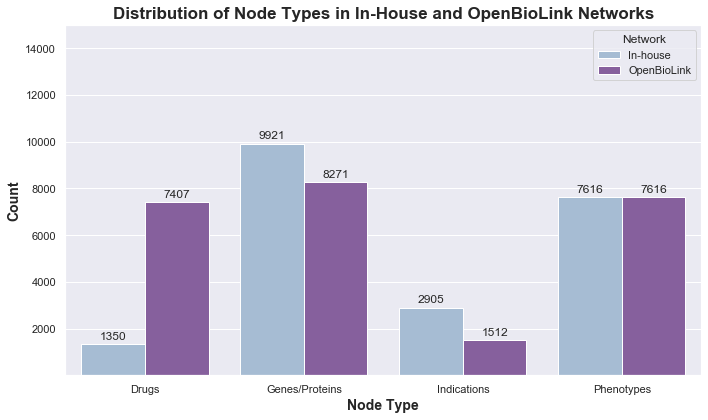

In [20]:
ax=sns.barplot(x="Node Types", y="Count", hue='Network', data=node_df, palette=['#9ebcda','#8856a7'])

plt.title('Distribution of Node Types in In-House and OpenBioLink Networks', fontsize=17, fontweight="bold")
plt.xlabel("Node Type", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.ylim(10, 15000)

sns.set(rc={'figure.figsize':(10,6)})

# Add counts above bars
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 200
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="center")

plt.tight_layout()
plt.savefig(
    ('nodes.png'),
    dpi=400,
    bbox_inches='tight', 
)
plt.show()
    
    

### Plot distributions of edges in custom and OpenBioLink networks

In [18]:
data_edges = {
    'Network': ['In-house','OpenBioLink','In-house','OpenBioLink','In-house','OpenBioLink','In-house','OpenBioLink'],
    'Count':[drug_protein_custom, drug_protein_obl, protein_protein_custom, protein_protein_obl, protein_disease_custom, protein_disease_obl, protein_phenotype_custom, protein_phenotype_obl],
    'Edge Types':['drug-protein','drug-protein','protein-protein','protein-protein','gene-indication','gene-indication','gene-phenotype','gene-phenotype']
}


edges_df = pd.DataFrame(data=data_edges)

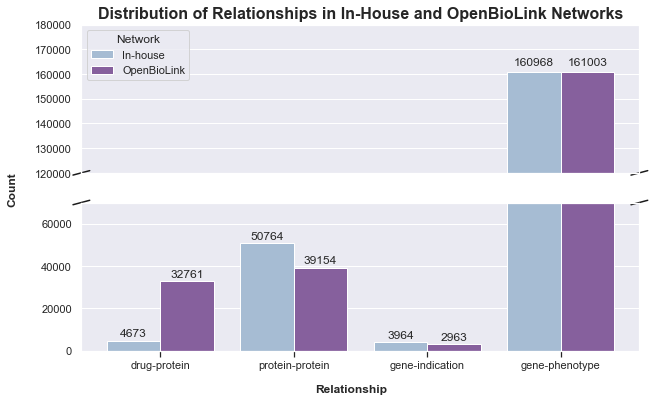

In [19]:
f, axis = plt.subplots(2, 1, sharex=True)

sns.set(rc={'figure.figsize':(10,6)})

axis[0].set_title('Distribution of Relationships in In-House and OpenBioLink Networks', fontsize=16, fontweight="bold")
bx = sns.barplot(x="Edge Types", y="Count", hue='Network', data=edges_df, palette=['#9ebcda','#8856a7'], ax=axis[0]) 
bx = sns.barplot(x="Edge Types", y="Count", hue='Network', data=edges_df, palette=['#9ebcda','#8856a7'], ax=axis[1]) 

labels=['drug-protein','protein-protein','gene-indication','gene-phenotype']

axis[1].set_xticklabels(labels=labels)

# Set axis labels
f.text(0.5, 0.03, 'Relationship', ha='center', fontsize=12, fontweight="bold")
f.text(0.022, 0.5, 'Count', va='center', rotation='vertical', fontsize=12, fontweight="bold")

axis[0].set_ylabel('')    
axis[0].set_xlabel('')

axis[1].set_ylabel('')    
axis[1].set_xlabel('')

axis[1].xaxis.tick_bottom()

axis[0].set_ylim(120000, 180000)
axis[1].set_ylim(0, 70000)

axis[0].legend(loc='upper left')
axis[1].legend().set_visible(False)
axis[0].legend(title='Network')

# Add line break to axis 
d = .015 
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d, +d), (-d, +d), **kwargs)
axis[0].plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)
axis[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
    
# Add counts above bars
for p in axis[1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 2000
    value = int(p.get_height())
    if p.get_height() < 160000:
        axis[1].text(_x, _y, value, ha="center")   
    else:
        axis[1].text(_x, 135000, value, ha="center")

plt.savefig(
    ('edges.png'),
    dpi=400,
    bbox_inches='tight', 
)
plt.show()
    